<a href="https://colab.research.google.com/github/anastasiya-h79/airline_analytics/blob/main/airline_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Описание данных

База данных об авиаперевозках:

*Таблица airports* — *информация об аэропортах:*

•	airport_code — трёхбуквенный код аэропорта,

•	airport_name — название аэропорта,

•	city — город,

•	timezone — часовой пояс.


*Таблица aircrafts* — *информация о самолётах:*

•	aircraft_code — код модели самолёта,

•	model — модель самолёта,

•	range — дальность полётов.


*Таблица tickets — информация о билетах:*

•	ticket_no — уникальный номер билета,

•	passenger_id — уникальный идентификатор пассажира,

•	passenger_name — имя и фамилия пассажира.


*Таблица flights — информация о рейсах:*

•	flight_id — уникальный идентификатор рейса,

•	departure_airport — аэропорт вылета,

•	departure_time — дата и время вылета,

•	arrival_airport — аэропорт прилёта,

•	arrival_time — дата и время прилёта,

•	aircraft_code — уникальный идентификатор самолёта.


*Таблица ticket_flights — стыковая таблица «рейсы-билеты»:*

•	ticket_no — номер билета,

•	flight_id — уникальный идентификатор рейса.


*Таблица festivals — информация о фестивалях:*

•	festival_id — уникальный номер фестиваля,

•	festival_date — дата проведения фестиваля,

•	festival_city — город проведения фестиваля,

•	festival_name — название фестиваля.


# Решение задач на SQL:

1. Найдите количество рейсов на каждой модели самолёта с вылетом в сентябре 2018 года. Назовите получившееся поле flights_amount и выведите его. Также напечатайте на экране поле model. Столбцы в таблице должны быть выведены в следующем порядке: model flights_amount

In [ ]:
SELECT
    model,
    COUNT(model) AS flight_amount
FROM
     aircrafts
     INNER JOIN flights ON aircrafts.aircraft_code=flights.aircraft_code
WHERE
    departure_time::date BETWEEN '2018-09-01' AND '2018-09-30'
GROUP BY
    model; 

2. Посчитайте отправленные в сентябре рейсы самолётов следующих моделей: Boeing, Airbus, другие (“other”). Назовите получившуюся переменную flights_amount и выведите её значение на экран.

In [ ]:
SELECT
    COUNT(model) AS flights_amount,
    model
FROM
    (SELECT
        CASE WHEN model LIKE 'Boeing%' THEN
            'Boeing'
        WHEN model LIKE 'Airbus%' THEN
            'Airbus'
        WHEN model NOT LIKE 'Boeing%' AND model NOT LIKE 'Airbus%' THEN
            'other'
        END AS model,
        departure_time
        FROM
            aircrafts
            INNER JOIN flights ON aircrafts.aircraft_code=flights.aircraft_code
        WHERE
            EXTRACT(MONTH FROM departure_time)='09') AS newt
GROUP BY
    model; 

3. Посчитайте среднее количество прибывающих рейсов в день для каждого города за август 2018 года. Назовите получившееся поле average_flights, вместе с ним выведите столбец city. Выводите столбцы в таком порядке: city, average_flights.

In [ ]:
SELECT
    T.city,
    AVG(T.flights_amount) AS average_flights
FROM (
    SELECT
        city,
        EXTRACT(day FROM flights.arrival_time) AS day_number,
        COUNT(flights.flight_id) AS flights_amount
    FROM
        flights
        INNER JOIN airports ON airports.airport_code = flights.arrival_airport
    WHERE
        CAST(flights.arrival_time AS date) BETWEEN '2018-08-01' AND '2018-08-31'
    GROUP BY
        city,
        day_number) AS T
GROUP BY
    city;

4. Установите фестивали, которые проходили с 23 июля по 30 сентября 2018 года в Москве, и номер недели, в которую они проходили. Выведите название фестиваля festival_name и номер недели festival_week.

In [ ]:
SELECT
    T.festival_week,
    T.festival_name
FROM (
        SELECT
            festival_name,
            EXTRACT(week FROM festivals.festival_date) AS festival_week
        FROM
            festivals
        WHERE
            festival_city = 'Москва'
            AND CAST(festivals.festival_date AS date) BETWEEN '2018-07-23' AND '2018-09-30') AS T;

5. Для каждой недели с 23 июля по 30 сентября 2018 года посчитайте билеты, которые купили на рейсы в Москву (номер недели week_number и количество билетов ticket_amount). Получите таблицу: с количеством купленных за неделю билетов; отметкой, проходил ли в эту неделю фестиваль; название фестиваля festival_name; номер недели week_number. Выводите столбцы в таком порядке: - week_number - ticket_amount - festival_week - festival_name

In [ ]:
SELECT
    T.week_number,
    T.ticket_amount,
    T.festival_week,
    T.festival_name
FROM (
        SELECT
            EXTRACT(week FROM flights.departure_time) AS week_number,
            COUNT(ticket_flights.ticket_no) AS ticket_amount
        FROM
            airports
            INNER JOIN flights ON airports.airport_code = flights.arrival_airport
            INNER JOIN ticket_flights ON flights.flight_id = ticket_flights.flight_id
        WHERE
            airports.city = 'Москва'
            AND CAST(flights.departure_time AS date) BETWEEN '2018-07-23' AND '2018-09-30'
        GROUP BY
            week_number) t
    LEFT JOIN (
        SELECT
            festival_name,
            EXTRACT(week FROM festivals.festival_date) AS festival_week
        FROM
            festivals
        WHERE
            festival_city = 'Москва'
            AND CAST(festivals.festival_date AS date) BETWEEN '2018-07-23' AND '2018-09-30') t2 ON t.week_number = t2.festival_week) AS T;


In [12]:
import pandas as pd
import plotly
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy import stats
import seaborn as sns

plt.rcParams["figure.figsize"] = (10,8) 
plt.style.use('ggplot') 
pd.set_option('display.max_columns', None)

# Аналитика средствами Python

У вас есть файлы, в которых содержатся результаты запросов из предыдущих заданий.

query_1.csv - В нём содержится информация:

•	model — о модели самолета,

•	flights_amount — количество рейсов для каждой модели самолетов model в сентябре 2018 года.

query_3.csv - В нём содержится информация:

•	city — о городах,

•	average_flights — о среднем количестве рейсов, прибывающих в город city за день в августе 2018 года.


***Для этих двух наборов данных нужно:***

•	импортировать файлы;

•	изучить данные в них;

•	проверить типы данных на корректность;

•	выбрать топ-10 городов по количеству рейсов;

•	построить графики: модели самолетов и количество рейсов, 
города и количество рейсов, топ-10 городов и количество рейсов;

•	сделать выводы по каждому из графиков, пояснить результат.


In [4]:
query_1=pd.read_csv('/content/query_1.csv')
query_1.info()
query_1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   model           8 non-null      object
 1   flights_amount  8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300


In [5]:
query_3=pd.read_csv('/content/query_3.csv')
query_3.info()
query_3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             101 non-null    object 
 1   average_flights  101 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


In [8]:
#query_1.isna().sum()
query_3.isna().sum()

city               0
average_flights    0
dtype: int64

In [9]:
#query_1.duplicated().sum()
query_3.duplicated().sum()

0

In [10]:
query_1.describe()

,flights_amount
count,8.000000
mean,2035.625000
std,1965.203947
min,300.000000
25%,605.250000
50%,795.000000
75%,4250.250000
max,4557.000000


In [11]:
query_3.describe()

,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


Выводы:

1. пропуски и дубликаты не обнаружены

2. типы данных соответствуют данным

In [14]:
# Топ-10 городов по количеству рейсов
query_3_plot = query_3.sort_values(by='average_flights', ascending=False).head(10)
query_3_plot

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


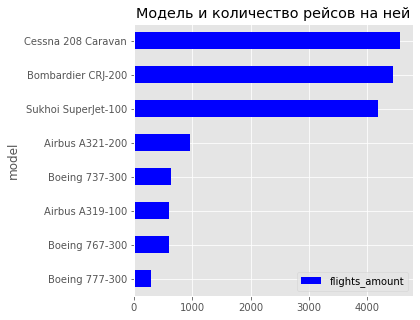

In [16]:
# График по датасету с самолетами (модели самолётов и количество рейсов)
query_1_plot = query_1.sort_values(by='flights_amount', ascending=False).head(10)
query_1_plot

query_1_plot.sort_values(by='flights_amount').\
    plot(x='model', y='flights_amount', kind='barh', grid=True, figsize=(5, 5),\
    title='Модель и количество рейсов на ней', color='b')

Вывод: наибольшее количество рейсов совершила 3 модели: Cessna 208, Bombardier 200 и Sukhoi 100.

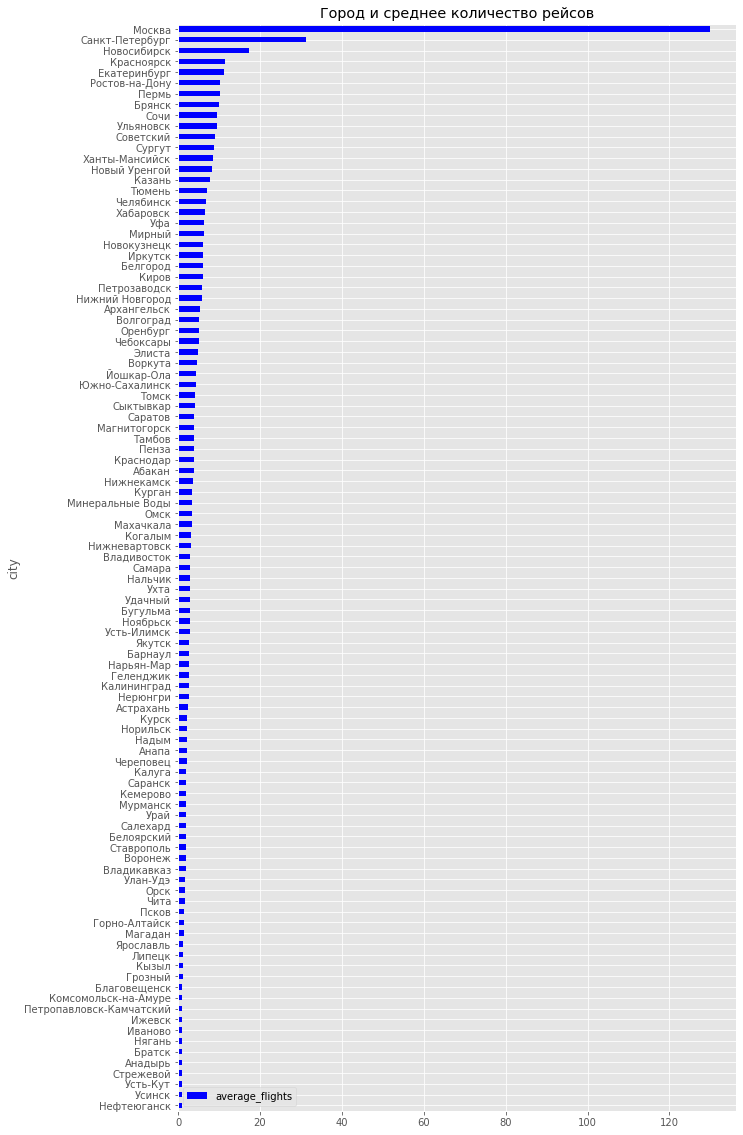

In [18]:
# График по датасету с городами (города и количество рейсов)
query_3_plot = query_3.sort_values(by='average_flights', ascending=False).head(103)
query_3_plot

query_3_plot.sort_values(by='average_flights').\
    plot(x='city', y='average_flights', kind='barh', grid=True, figsize=(10, 20),\
    title='Город и среднее количество рейсов', color='b')

Вывод: Москва по количеству рейсов находится в большом отрыве от остальных городов. Еще 2 города - СПб и Новосибирск - также насчитывают значительно больше рейсов, чем из остальных  городов. 

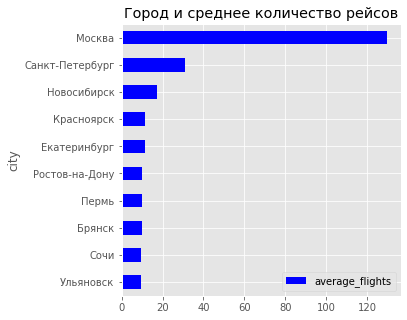

In [19]:
# Топ-10 городов и количество рейсов
query_3_plot = query_3.sort_values(by='average_flights', ascending=False).head(10)
query_3_plot

query_3_plot.sort_values(by='average_flights').\
    plot(x='city', y='average_flights', kind='barh', grid=True, figsize=(5, 5),\
    title='Город и среднее количество рейсов', color='b')

Вывод: по количеству рейсов с большим отрывом от других городов лидирует Москва, за ней Санкт-Петербург и Новосибирск